In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as wc
from wordcloud import WordCloud, STOPWORDS

## How are people generally rating

We want to look at the average rating for each of the genres. We want to know if there are some genres that are generally rated higher than other genres or are the average rating are not impacted by the genres at all.

In [109]:
ratings = pd.read_csv('Data/ratings.csv')

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [28]:
rating_frequency = ratings['rating'].value_counts()
ratingDf = pd.DataFrame({'rating':rating_frequency.index, 'frequency':rating_frequency.values})

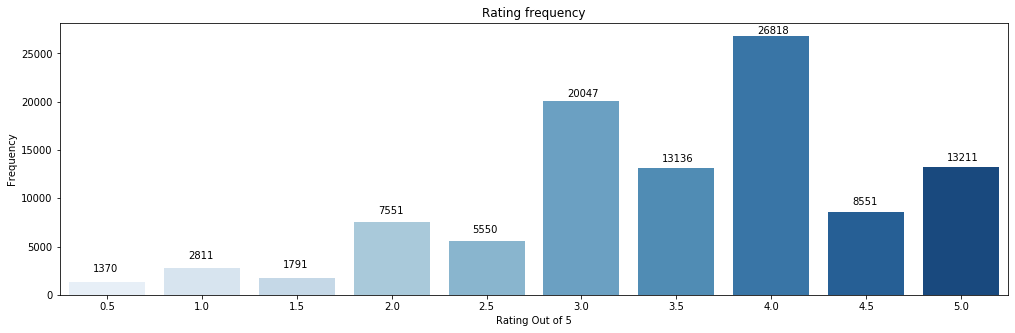

In [48]:
plt.figure(figsize=(17,5))
ax = sns.barplot(x=ratingDf.rating, y=ratingDf.frequency,  palette="Blues")
ax.set_title("Rating frequency")
ax.set_xlabel("Rating Out of 5")
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() + 0.20, p.get_height()/1.03),
                xytext=(5, 10), textcoords='offset points')
plt.show()

<span style="color:blue">Inferences: <br></span> 
                       We see a few interesting inferences from the graph<br>
                       i. Rating 4 and 3 have the highest frequency. This could imply that most people are more comfortable giving mid level ratings rather than going very high or very low. <br>
ii. All the 0.5 values aren't ver popular as compared to the full number they are neighbours to. This implies that people have a tendency to choose a full number over .5s
iii. Very few ratings are between 0.5 to 1.5 . It would make sense to then conclude either that people are a little liberal while scoring movies they didn't enjoy or if they didn't enjoy a movie, they generally don't take the effort to rate it

## What genres are more frequent in the listing 

There are about 20 genres that the 10k movies are tagged as. Each movie can be tagged with more than one tag. 
Let's take a look at how many movies each genre is tagged with before diving deep.

In [159]:
movies = pd.read_csv('Data/movies.csv')
movies_genre=pd.concat([pd.Series(row['movieId'], row['genres'].split('|'))              
                    for _, row in movies.iterrows()]).reset_index()
movies_genre.columns = ['genre', 'movieId']

In [161]:
genre_frequency = movies_genre['genre'].value_counts()
genre_frequency_df = pd.DataFrame({'genre':genre_frequency.index, 'frequency':genre_frequency.values})

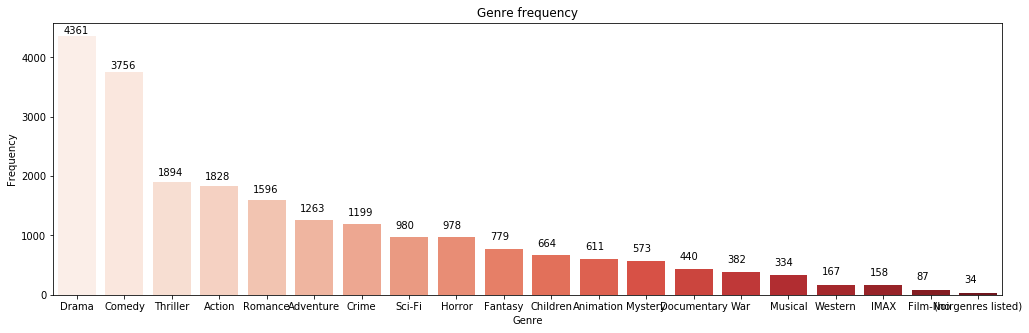

In [180]:
plt.figure(figsize=(17,5))
ax = sns.barplot(x=genre_frequency_df.genre, y=genre_frequency_df.frequency,  palette="Reds")
ax.set_title("Genre frequency")
ax.set_xlabel("Genre")
ax.set_ylabel("Frequency")
for p in ax.patches:
    ax.annotate("%d" % p.get_height(), (p.get_x() , p.get_height()/1.03),
                xytext=(5, 10), textcoords='offset points')
plt.show()

<span style="color:blue">Inferences: </span>  
i. Of the 10k movies, around 4300 are tagged as Drama, the most popular genre. What this tells us is that recommending movies just based on genre a user seems to like, might be futile. <br>
ii. There also seem to be movies that have no tag. If a user likes one of those movies and would like something similar, going by genre might be counterproductive.

## What are the most popular words in the tags

Each movie is tagged with a certain set of words that would help provide a brief idea of what the movie could be about (other than the genre)
We want to take a deeper dive and make a word cloud from these tags to understand if these tags are in fact things that would help understanding and thus recommending movies easier.

In [52]:
tags = pd.read_csv('Data/tags.csv')

In [88]:
text = ''
for i in tags['tag']:
    text= text + i + ' ' 

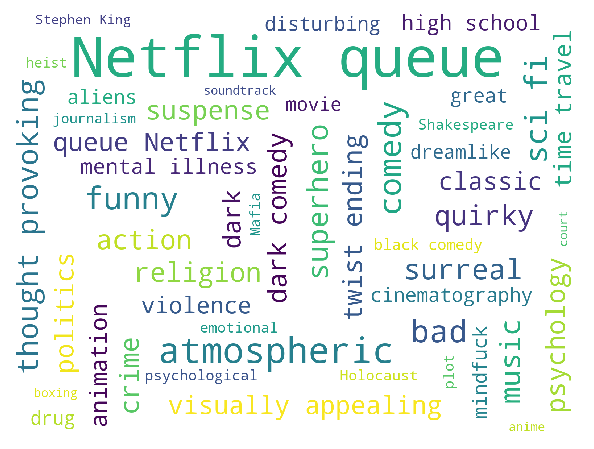

In [105]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(background_color="white",margin=20,width=800,height=600,prefer_horizontal=0.7,max_words=50,scale=2,
                stopwords = stopwords).generate(text) 
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.show() 

<span style="color:blue">Inferences: </span>  
i. There are not many words that seem to appear the most frequently other than Netflix and queue but those hardly seem to be descriptive. <br>
ii. There are a few descriptive words that are not genres but a little more in depth. 
iii. A lot of the words seem to have negative canotation - drugs, dark comedy, mental illness. This needs to be probed more.

## How is each genre faring

In [132]:
merged_mr = pd.merge(left=movies_genre, right=ratings, left_on='movieId', right_on='movieId')

In [155]:
mr = merged_mr.groupby(['genre'])['rating'].mean()
merged_mr_df = pd.DataFrame({'genre':mr.index, 'rating':mr.values})

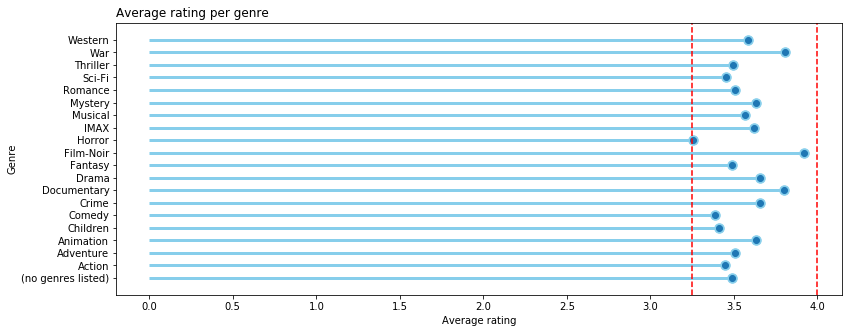

In [154]:
my_range=range(0,len(merged_mr_df['rating']))
plt.figure(figsize=(13,5))
plt.hlines(y=merged_mr_df['genre'], xmin=0, xmax=merged_mr_df['rating'], color='skyblue', linewidth = 3)
plt.plot(merged_mr_df['rating'], my_range, "o")
plt.scatter(merged_mr_df['rating'], my_range, color='skyblue', s=90, alpha=1) 
# Add titles and axis names
plt.title("Average rating per genre", loc='left')
plt.xlabel('Average rating')
plt.ylabel('Genre')
plt.axvline(x=3.25, linestyle='--', color ='red')
plt.axvline(x=4, linestyle='--', color='red' )
plt.show();

<span style="color:blue">Inferences: </span>  
Surprisingly it seems that the genre does not affect the average ratings, ie from the ratings given, we can't tell for sure if a particular genre is well loved or hated by the raters.
The averages values fall between 3.25 to 4 for all genres.